In [32]:
#import numpy as np
from scipy.optimize import minimize
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [147]:
def objective(z):
    p = 0
    for i in range(int(len(z)/3)):
        for j in range(int(len(z)/3)):
            if i != j:
                #equation
                x1 = z[i*3]
                y1 = z[i*3+1]
                d1 = z[i*3+2] 
                x2 = z[j*3]
                y2 = z[j*3+1]
                #depends on angle of first student
                
                x = (x2-x1)*math.cos(d1)+(y2-y1)*math.sin(d1)
                y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)
                v1 = ( cube3(x)-cube3(x-6) )
                v2 = ( cube3(y)-cube3(y-6) )
                value = v1 * v2
                p = p + value
    return p

def cube3(num):
    sign = 1
    if num < 0:
        sign = -1
        num = abs(num)
    num = num**(1/3)
    num = num * sign
    return num

In [148]:
students = 10
guess = []
space = int(round((class_y * class_x) / students))
index = 0
for i in range(students):
    yspot = int(index/class_x) 
    xspot = int(index%class_x)
    guess.append(3*i)
    guess.append(3*i)
    guess.append(0)
    index += space
print(objective(guess))

115.29523825404364


In [149]:
class_y = 30
class_x = 20
x_bnd = (0,class_x-2)
y_bnd = (0,class_y-2)
d_bnd = (0,2*math.pi)
bnds = ()
for i in range(students):
    bnds = bnds + (y_bnd,x_bnd,d_bnd)
#con1 = {'type': 'ineq','fun': constraint1}
#con2 = {'type': 'eq','fun': constraint2}
cons = []

In [150]:
sol = minimize(objective,guess,method='SLSQP',\
                bounds=bnds,constraints=cons)

In [151]:
print(sol)

     fun: 26.007584462998878
     jac: array([ 2.35502720e-02,  4.90196228e-01, -6.20775223e-02, -1.01648092e-01,
       -6.82420731e-02, -7.92403221e-01,  1.07136965e-01,  8.25068951e-02,
       -2.39827633e-01,  5.39050102e-01, -5.38163185e-02, -6.00810051e-02,
        1.32653713e-02, -4.58459854e-02, -1.08496666e-01, -1.44195557e-03,
        2.93353558e-01,  3.10682297e-01,  1.02636814e-02,  5.49163346e+01,
        2.52809525e-01, -2.96571255e-02, -5.53860588e+01,  8.22259140e+02,
       -2.84481049e-03, -3.72946739e-01, -7.01520443e-01, -5.57675600e-01,
        1.44517422e-01,  1.04703808e+00])
 message: 'Iteration limit reached'
    nfev: 3200
     nit: 100
    njev: 100
  status: 9
 success: False
       x: array([1.74055078e+00, 7.50434900e-10, 3.37349467e+00, 2.52489206e-01,
       1.03488554e+01, 5.06103619e-01, 4.35228529e+00, 2.11871031e+00,
       6.25262002e+00, 1.43317929e-09, 1.07380472e+00, 3.91815548e+00,
       1.74175401e+01, 9.04276573e+00, 7.77871549e-01, 1.5569546

In [152]:
for i in range(int(len(sol.x)/3)):
    print(sol.x[i*3:(i+1)*3])

[1.74055078e+00 7.50434900e-10 3.37349467e+00]
[ 0.25248921 10.34885539  0.50610362]
[4.35228529 2.11871031 6.25262002]
[1.43317929e-09 1.07380472e+00 3.91815548e+00]
[17.41754014  9.04276573  0.77787155]
[1.55695465e+01 1.06184781e-08 3.03988266e+00]
[19.48611438 17.99988712  1.50786837]
[4.54423762e+00 1.80000000e+01 4.78624077e-12]
[26.75924945 14.15311182  0.66811102]
[2.80000000e+01 1.09815476e+01 1.49039555e-10]


In [153]:
#functions
def addTable(x,y,d):
    #randomize table orientation
    ns_table = bool(math.floor(random()*2))
    if ns_table and sum(x.count(1) for x in table_placement_ns) == 0:
        if sum(x.count(1) for x in table_placement_ew) == 0:
            return -1
        else:
            ns_table = False
    elif sum(x.count(1) for x in table_placement_ew) == 0:
        if sum(x.count(1) for x in table_placement_ns) == 0:
            return -1
        else:
            ns_table = True
    table_x = table[1-ns_table]
    table_y = table[ns_table]
    if ns_table:
        t = table_placement_ns
    else:
        t = table_placement_ew
    #count how many available positions there are for the specific table orientation
    available = sum(x.count(1) for x in t)
    #rng for which position
    num = math.ceil(random()*available)
    #put at that position
    for i in range(class_y):
        for j in range(class_x):
            if t[i][j] == 1:
                num -= 1
            if num == 0:
                x = j
                y = i
                break
        if num == 0:
            break
            
    #update classroom
    for i in range(y, y+table_y):
        for j in range(x,x+table_x):
            classroom[i][j] = 1
    
    #update table_placement_ns
    for i in range(y-(table[1]-1), y+table[ns_table]):
        for j in range(x-(table[0]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ns[i][j] = 0
    
    #update table_placement_ew
    for i in range(y-(table[0]-1), y+table[ns_table]):
        for j in range(x-(table[1]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ew[i][j] = 0
    
    #update chair_placement    
    for i in range(y-(chair[0]), y+table[ns_table]+1):
        for j in range(x-(chair[0]), x+table[1-ns_table]+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                if i==y-(chair[0]) and j==x-(chair[0]) or i==y-chair[0] and j==x+table[1-ns_table] or i==y+table[ns_table] and j==x-chair[0] or i==y+table[ns_table] and j==x+table[1-ns_table]:
                    continue
                elif (i==y-chair[0] or i==y+table[ns_table] or j==x-chair[0] or j==x+table[1-ns_table]) and chair_placement[i][j]!=0:
                    chair_placement[i][j] = 2
                else:
                    chair_placement[i][j] = 0
    #add table
    tables.append([x, y, ns_table])

In [154]:
def addChair(y,x,d):
    #count how many chair positions there are
    pref = 2
    available = sum(x1.count(pref) for x1 in chair_placement)
    if available <= 0:
        pref = 1
    if pref == 1:
        available = sum(x1.count(pref) for x1 in chair_placement)
        if available <= 0:
            return -1
    
    #update classroom
    for i in range(y, y+chair[0]):
        for j in range(x,x+chair[1]):
            classroom[i][j] = 2
            
    #update table_placement_ns
    for i in range(y-(table[1]-1), y+chair[0]):
        for j in range(x-(table[0]-1), x+chair[0]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ns[i][j] = 0
    
    #update talbe_placement_ew
    for i in range(y-(table[0]-1), y+chair[0]):
        for j in range(x-(table[1]-1), x+chair[0]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ew[i][j] = 0
    
    #update chair_placement
    for i in range(class_y):
        for j in range(class_x):
            if math.sqrt((i-y)**2 + (j-x)**2) < 6:
                chair_placement[i][j] = 0
    
    #add chair
    chairs.append([x,y,d])

In [155]:
#prompt input
class_y = int(input("Enter length of classroom in feet: "))
class_x = int(input("Enter width of classroom in feet: "))
#table_long = input("Enter length of table in feet: ")
#table_short = input("Enter width of table feet: ")
#if (table_short > table_long):
#    temp = table_short
#    table_short = table_long
#    table_long = temp
#table == [int(table_short),int(table_long)]
#table_num = input("Enter how many tables: ")
#students = input("Enter how many students there are: ")
chair = [2,2] #make sure 0 index is smaller than 1 index

Enter length of classroom in feet: 30
Enter width of classroom in feet: 20


In [156]:
#set input
table_long = 4
table_short = 2
table_num = 10
students = 10
table = [int(table_short),int(table_long)]
#set up arrays
tables = []
chairs = []
classroom = [[0 for i in range(class_x)] for j in range(class_y)]
chair_placement = [[1 for i in range(class_x)] for j in range(class_y)]
for i in range(class_y):
    chair_placement[i][class_x-1] = 0       
for j in range(class_x):
    chair_placement[class_y-1][j] = 0  
table_placement_ns = [[1 for i in range(class_x)] for j in range(class_y)]
table_placement_ew = [[1 for i in range(class_x)] for j in range(class_y)]
for i in range(class_y):
    for j in range(class_x):
        if j >= class_x-(table_long-1) or i >= class_y-(table_short-1):
            table_placement_ew[i][j] = 0
for i in range(class_y):
    for j in range(class_x):
        if j >= class_x-(table_short-1) or i >= class_y-(table_long-1):
            table_placement_ns[i][j] = 0
            
#adding tables and chairs
#for i in range(table_num):
#    if (addTable() == -1):
#        print("Not enough space!")
        
for i in range(int(len(sol.x)/3)):
    if (addChair(int(round(sol.x[i*3])),int(round(sol.x[i*3+1])),sol.x[i*3]+2) == -1):
        print("Not enough space!")

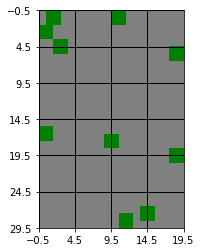

In [157]:
# create discrete colormap
cmap = colors.ListedColormap(['grey','blue','green'])
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(classroom, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(-.5, class_x, 5))
ax.set_yticks(np.arange(-.5, class_y, 5))

plt.show()